In [1]:
import cbsodata
import pandas
import seaborn as sns

In [2]:
# Datasets:
electricity_balance = pandas.DataFrame(cbsodata.get_data('84575ENG'))
info = cbsodata.get_info('84575ENG')
print("title: " + info['Title'] + "\nLast Modified: " + info['Modified'])


title: Electricity balance sheet; supply and consumption
Last Modified: 2024-01-31T02:00:00


In [3]:
electricity_balance.tail(15)

,ID,Periods,GrossProduction_1,OwnConsumptionForElectrProduction_2,NetProductionTotal_3,NuclearEnergy_4,FuelsTotal_5,Coal_6,PetroleumProducts_7,NaturalGas_8,...,UnitedKingdom_21,Norway_22,ExportsTotal_23,Belgium_24,Denmark_25,Germany_26,UnitedKingdom_27,Norway_28,DistributionLosses_29,NetConsumptionCalculated_30
845,845,2022,121810.0,3800.0,118010.0,3930.0,74993.0,16481.0,1554.0,46678.0,...,2123.0,1803.0,22811,8510.0,1284.0,8910.0,3689.0,419.0,4869.0,108875.0
846,846,2023 January,10384.0,265.0,10119.0,361.0,6251.0,1438.0,132.0,3791.0,...,45.0,255.0,2082,768.0,100.0,609.0,534.0,72.0,455.0,9712.0
847,847,2023 February,10005.0,263.0,9743.0,326.0,6640.0,1484.0,125.0,4150.0,...,3.0,362.0,2122,924.0,86.0,560.0,545.0,6.0,405.0,8599.0
848,848,2023 March,10869.0,239.0,10630.0,346.0,6241.0,1345.0,97.0,4028.0,...,12.0,246.0,2401,937.0,163.0,588.0,633.0,80.0,416.0,9333.0
849,849,2023 1st quarter,31258.0,766.0,30492.0,1033.0,19132.0,4266.0,354.0,11969.0,...,59.0,863.0,6605,2628.0,349.0,1757.0,1712.0,159.0,1277.0,27643.0
850,850,2023 April,9731.0,218.0,9513.0,NaN,5473.0,1063.0,159.0,3378.0,...,17.0,242.0,2334,1038.0,107.0,637.0,479.0,73.0,377.0,8282.0
851,851,2023 May,10070.0,198.0,9872.0,347.0,4712.0,511.0,134.0,3349.0,...,76.0,286.0,2376,727.0,187.0,1078.0,324.0,60.0,374.0,8743.0
852,852,2023 June,10534.0,152.0,10381.0,341.0,4695.0,192.0,99.0,4028.0,...,164.0,262.0,2214,419.0,233.0,1226.0,286.0,50.0,368.0,9135.0
853,853,2023 2nd quarter,30334.0,569.0,29765.0,689.0,14880.0,1766.0,392.0,10755.0,...,256.0,791.0,6924,2184.0,527.0,2941.0,1089.0,183.0,1120.0,26160.0
854,854,2023 July,10149.0,160.0,9989.0,350.0,4330.0,272.0,128.0,3445.0,...,222.0,271.0,2334,562.0,136.0,1300.0,283.0,53.0,387.0,8972.0


In [4]:
def month_as_number(month):
    month_name = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    
    if month in month_name:
        month_number = month_name.index(month) + 1
        return month_number

def quarter_as_number(quarter):
    quarter_name = ['1st', '2nd', '3rd', '4th']
    
    if quarter in quarter_name:
        quarter_number = quarter_name.index(quarter) + 1
        return quarter_number

In [5]:
years = []
months = []
quarters = []

# for every entry append the row and fill in the extra columns
for entry in electricity_balance.index:
    periods = electricity_balance['Periods'][entry].split(' ')
    year = periods[0]
    years.append(year)
    if len(periods) == 2:
        month = month_as_number(periods[1])
        months.append(month)
    else:
        months.append(0)
    if len(periods) == 3:
        quarter = quarter_as_number(periods[1])
        quarters.append(quarter)
    else:
        quarters.append(0)
# Create new colums prepopulated with all values
if not 'year' in electricity_balance:
    electricity_balance.insert(32, "year", years)
if not 'month' in electricity_balance:
    electricity_balance.insert(33, "month", months)
if not 'quarter' in electricity_balance:
    electricity_balance.insert(34, "quarter", quarters)

In [7]:
electricity_balance

,ID,Periods,GrossProduction_1,OwnConsumptionForElectrProduction_2,NetProductionTotal_3,NuclearEnergy_4,FuelsTotal_5,Coal_6,PetroleumProducts_7,NaturalGas_8,...,Belgium_24,Denmark_25,Germany_26,UnitedKingdom_27,Norway_28,DistributionLosses_29,NetConsumptionCalculated_30,year,month,quarter
0,0,1929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,1929,0.0,0.0
1,1,1930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,1930,0.0,0.0
2,2,1931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,1931,0.0,0.0
3,3,1932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,1932,0.0,0.0
4,4,1933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,1933,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,855,2023 August,10197.0,203.0,9993.0,350.0,5558.0,384.0,153.0,4348.0,...,262.0,223.0,1487.0,231.0,25.0,365.0,8610.0,2023,8.0,0.0
856,856,2023 September,9741.0,214.0,9527.0,338.0,5484.0,467.0,134.0,4157.0,...,605.0,143.0,882.0,124.0,7.0,380.0,8803.0,2023,9.0,0.0
857,857,2023 3rd quarter,30087.0,577.0,29510.0,1038.0,15372.0,1123.0,415.0,11951.0,...,1429.0,501.0,3668.0,639.0,84.0,1133.0,26386.0,2023,0.0,3.0
858,858,2023 October,9756.0,240.0,9515.0,355.0,4941.0,945.0,122.0,3155.0,...,700.0,76.0,765.0,278.0,19.0,415.0,9154.0,2023,10.0,0.0


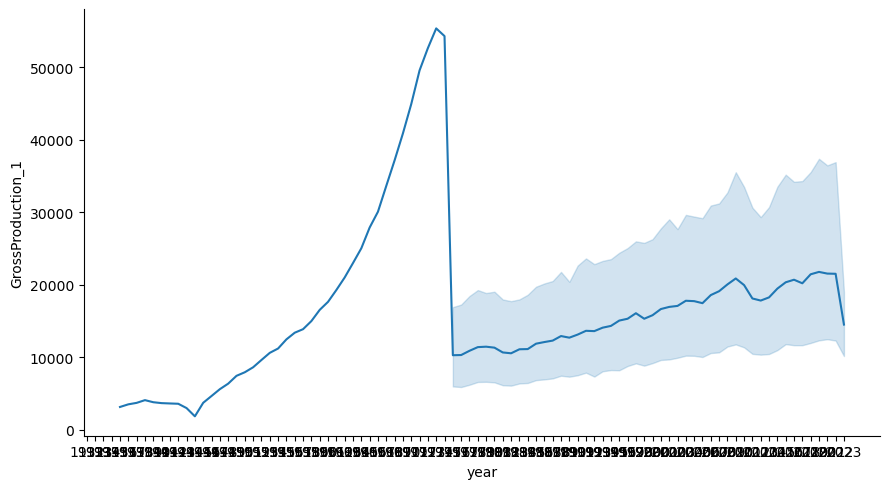

In [9]:
GrossProduction = sns.relplot(data=electricity_balance, x="year", y="GrossProduction_1", kind="line", aspect=0.6*3)